# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Data sets'

In [2]:
# importing files 
 
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate_answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [3]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [4]:
climate_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data prep

In [5]:
# fixing issue where original data in str format causes misrepesenting of years 
climate['DATE'] = pd.to_datetime(climate['DATE'].astype(str), format='%Y%m%d', errors='coerce')

In [25]:
# looking at 2019 to reduce run times 
df2019 = climate[climate['DATE'].astype(str).str.contains('2019')] 
df2019.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.0,3.650000e+02,3.650000e+02,365.000000,3.650000e+02,365.0,3.650000e+02,3.650000e+02,3.650000e+02,365.0
mean,2019-07-02 00:00:00,6.526027,5.219178,1.981096,0.722356,1.016973,1.303836,0.215288,0.041096,5.305205,...,5.0,8.200000e-01,1.014200e+00,1.111836,4.100000e-01,0.0,3.400000e+00,1.070000e+01,7.900000e+00,13.5
min,2019-01-01 00:00:00,1.000000,0.000000,0.600000,0.420000,0.989700,0.130000,0.000000,0.000000,0.000000,...,5.0,8.200000e-01,1.014200e+00,0.040000,4.100000e-01,0.0,3.400000e+00,1.070000e+01,7.900000e+00,13.5
25%,2019-04-02 00:00:00,4.000000,4.000000,1.300000,0.640000,1.012100,0.460000,0.000000,0.000000,0.700000,...,5.0,8.200000e-01,1.014200e+00,0.360000,4.100000e-01,0.0,3.400000e+00,1.070000e+01,7.900000e+00,13.5
50%,2019-07-02 00:00:00,7.000000,6.000000,1.700000,0.730000,1.016800,1.070000,0.000000,0.000000,4.500000,...,5.0,8.200000e-01,1.014200e+00,0.900000,4.100000e-01,0.0,3.400000e+00,1.070000e+01,7.900000e+00,13.5
75%,2019-10-01 00:00:00,10.000000,7.000000,2.300000,0.820000,1.021700,2.070000,0.210000,0.000000,9.200000,...,5.0,8.200000e-01,1.014200e+00,1.650000,4.100000e-01,0.0,3.400000e+00,1.070000e+01,7.900000e+00,13.5
max,2019-12-31 00:00:00,12.000000,8.000000,6.500000,0.950000,1.039300,3.130000,2.960000,4.000000,15.000000,...,5.0,8.200000e-01,1.014200e+00,3.460000,4.100000e-01,0.0,3.400000e+00,1.070000e+01,7.900000e+00,13.5
std,NaN,3.452584,2.326664,1.007471,0.119828,0.008814,0.882313,0.465027,0.341231,4.627563,...,0.0,5.225211e-15,1.778795e-15,0.873964,2.612605e-15,0.0,2.668193e-15,6.937301e-14,5.247446e-14,0.0


In [26]:
# removing the extra bits before scaling
df2019 = df2019.drop(['DATE','MONTH'], axis = 1)

In [8]:
# scaling
scaler = StandardScaler()
scaled_2019 = pd.DataFrame(scaler.fit_transform(df2019))
scaled_2019.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.336058,0.515763,1.150256,1.854928,-0.605872,-0.312858,-0.1206,-1.148010,-0.925549,-0.819644,...,0.0,-1.110223e-16,-2.220446e-16,-0.941645,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,0.766448,0.018790,-0.270393,2.127592,-1.105245,-0.442060,-0.1206,-1.126370,-1.162229,-1.074041,...,0.0,-1.110223e-16,-2.220446e-16,-0.907271,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-0.955112,-1.173946,-0.103257,2.536589,-0.617221,-0.463593,-0.1206,-0.044405,-1.663433,-1.694132,...,0.0,-1.110223e-16,-2.220446e-16,-1.067681,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-0.524722,-0.875762,0.565283,2.411618,-0.639920,-0.463593,-0.1206,-0.001126,-1.635589,-1.678232,...,0.0,-1.110223e-16,-2.220446e-16,-1.010392,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,1.196837,-0.378789,0.815986,2.002621,-0.912305,-0.377459,-0.1206,-1.148010,-1.329297,-1.058141,...,0.0,-1.110223e-16,-2.220446e-16,-1.124970,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


In [9]:
scaled_2019.shape

(365, 168)

In [13]:
# Copy columns headers from original temp dataset, pasting to this scaled data set

columns=climate.columns.values.tolist() #create a list of column names for your df
columns.remove('DATE')
columns.remove('MONTH')
scaled_2019.columns = columns
scaled_2019.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.336058,0.515763,1.150256,1.854928,-0.605872,-0.312858,-0.1206,-1.148010,-0.925549,-0.819644,...,0.0,-1.110223e-16,-2.220446e-16,-0.941645,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,0.766448,0.018790,-0.270393,2.127592,-1.105245,-0.442060,-0.1206,-1.126370,-1.162229,-1.074041,...,0.0,-1.110223e-16,-2.220446e-16,-0.907271,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-0.955112,-1.173946,-0.103257,2.536589,-0.617221,-0.463593,-0.1206,-0.044405,-1.663433,-1.694132,...,0.0,-1.110223e-16,-2.220446e-16,-1.067681,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-0.524722,-0.875762,0.565283,2.411618,-0.639920,-0.463593,-0.1206,-0.001126,-1.635589,-1.678232,...,0.0,-1.110223e-16,-2.220446e-16,-1.010392,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,1.196837,-0.378789,0.815986,2.002621,-0.912305,-0.377459,-0.1206,-1.148010,-1.329297,-1.058141,...,0.0,-1.110223e-16,-2.220446e-16,-1.124970,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


# Dendrogram

## Dendrograms with full climate data

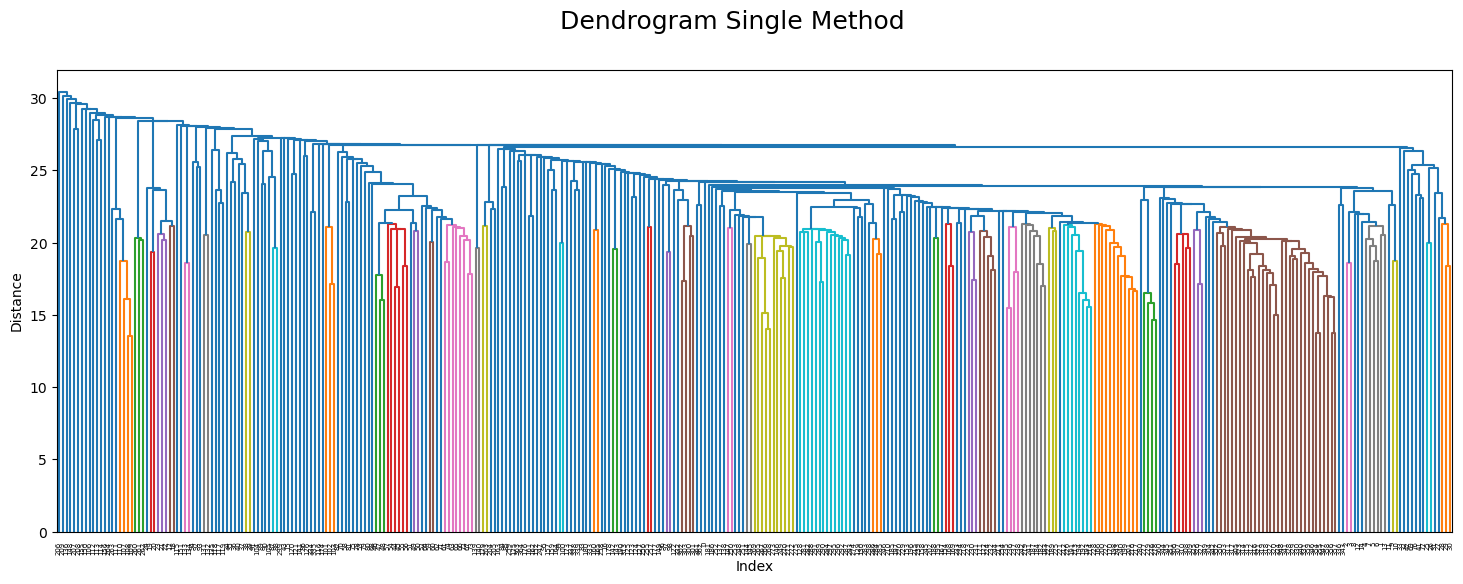

In [27]:
#Compare all stations in 2019 - single method

distance_single = linkage(df2019,method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

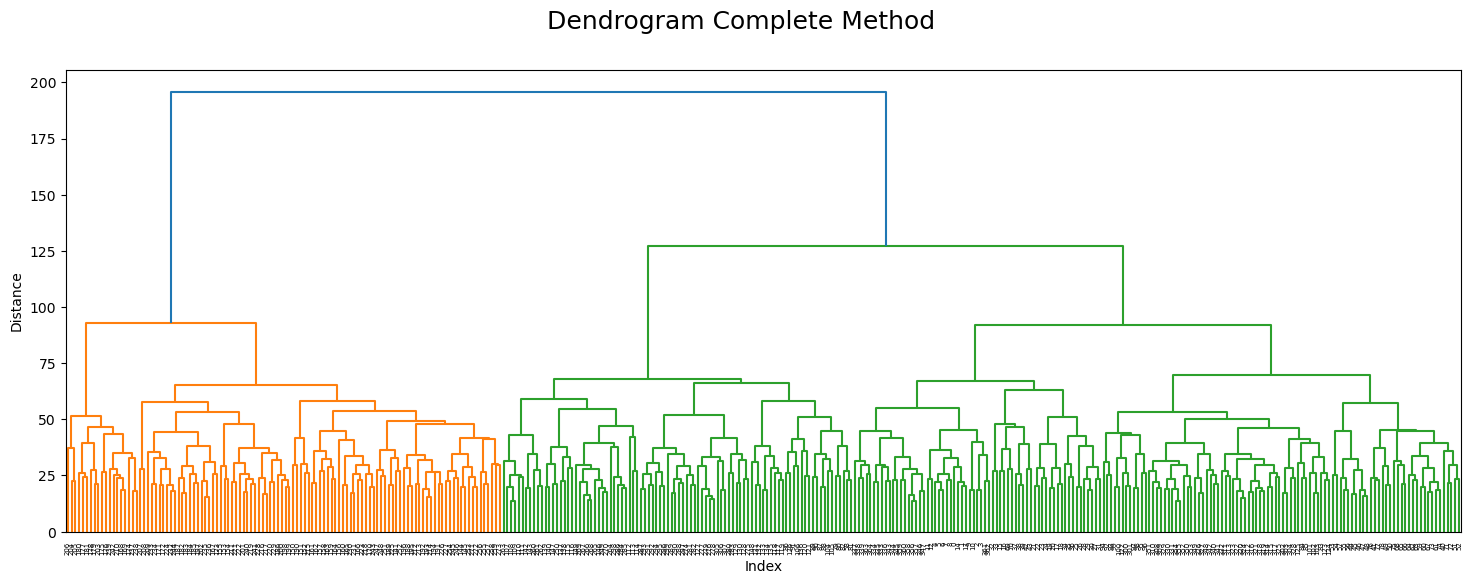

In [28]:
distance_complete = linkage(df2019,method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

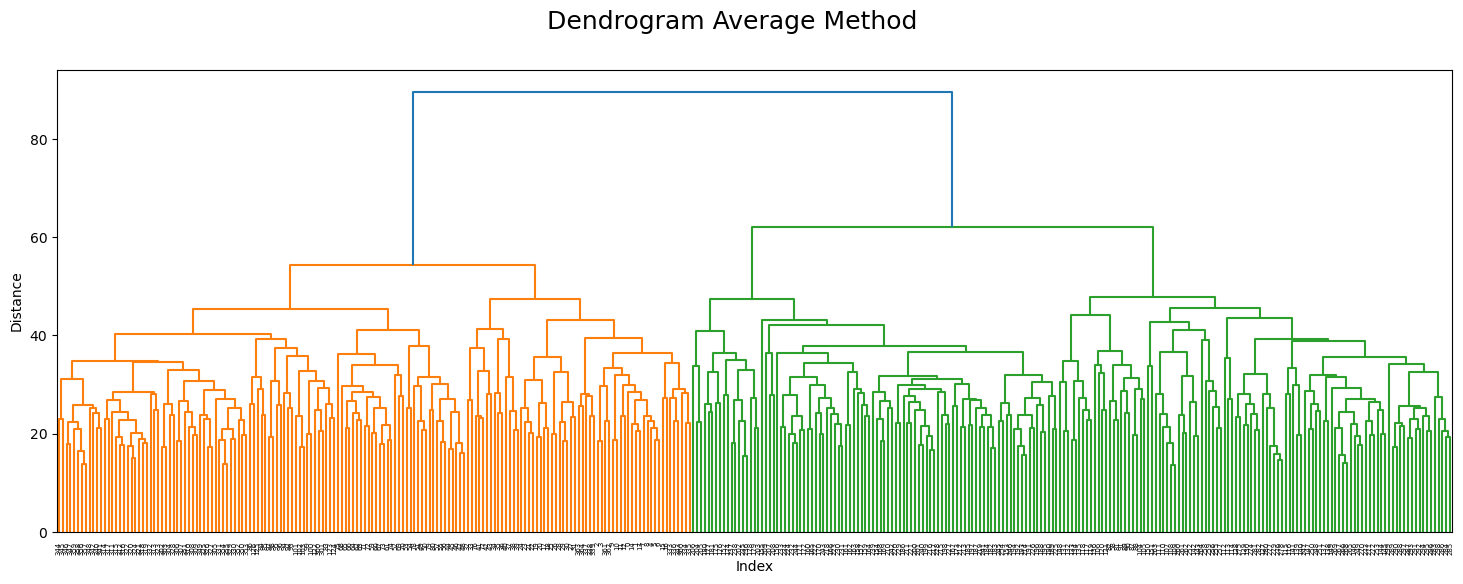

In [29]:
distance_average = linkage(df2019,method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

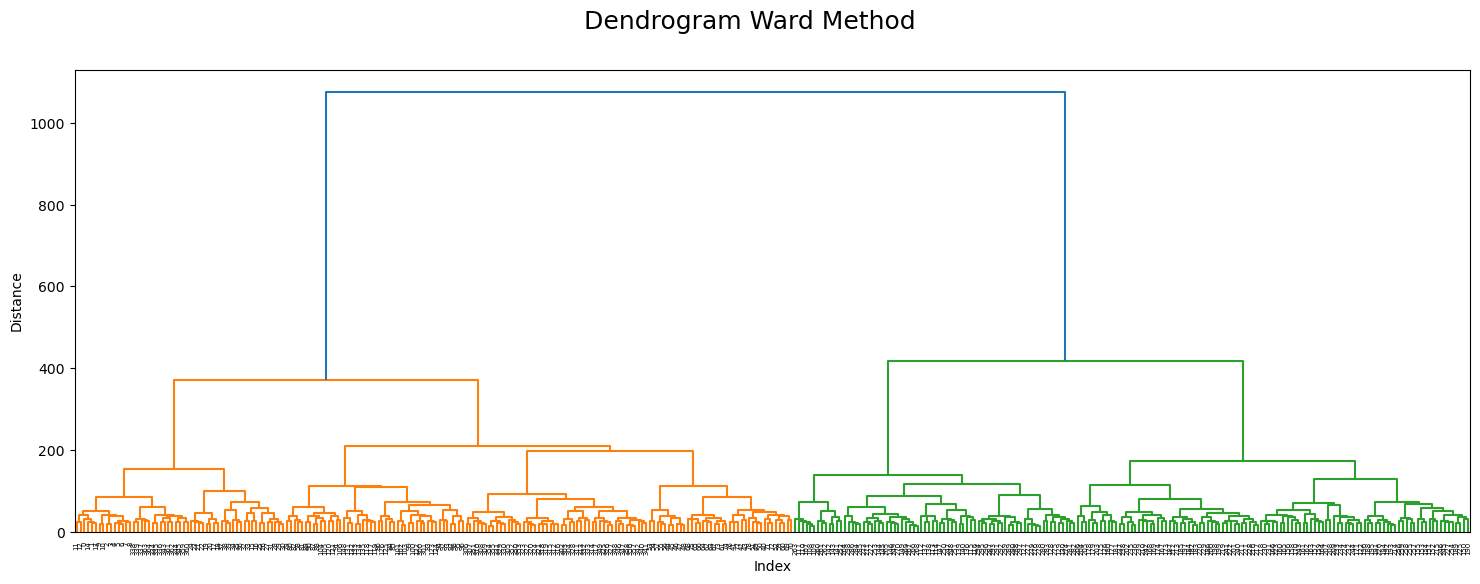

In [31]:
distance_ward = linkage(df2019,method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## Dendrograms with scaled data

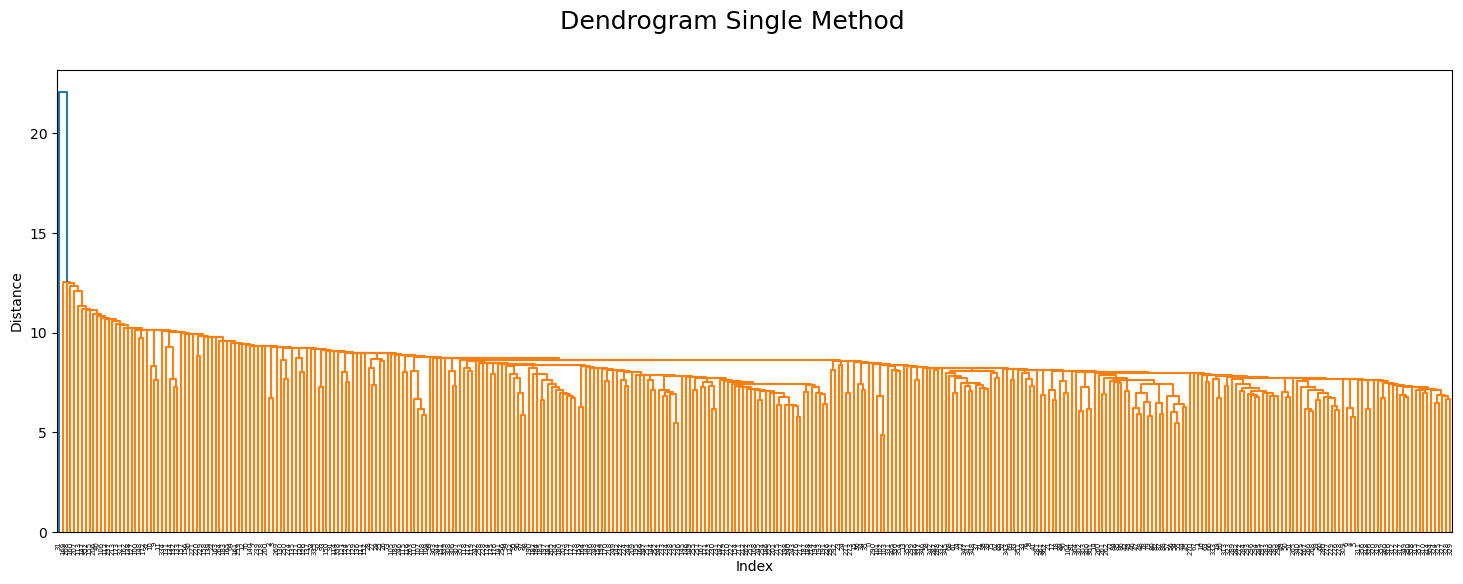

In [32]:
scaled_single = linkage(scaled_2019,method="single")
plt.figure(figsize=(18,6))
dendrogram(scaled_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

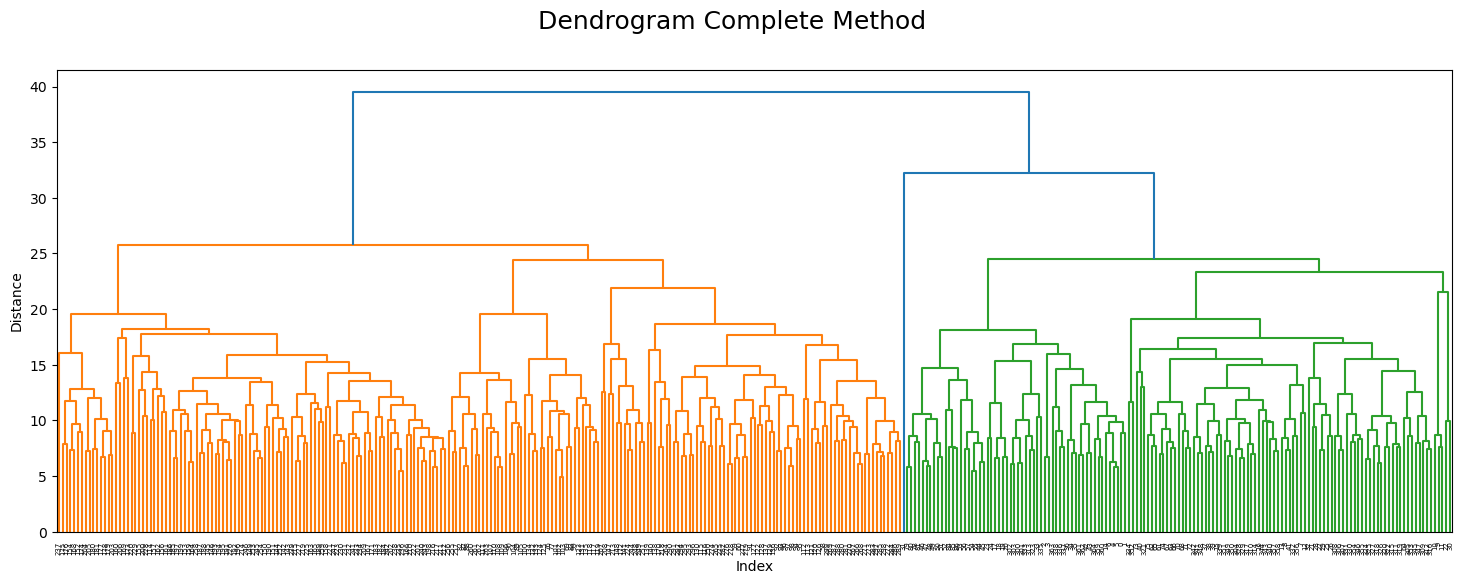

In [33]:
scaled_complete = linkage(scaled_2019,method="complete")
plt.figure(figsize=(18,6))
dendrogram(scaled_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

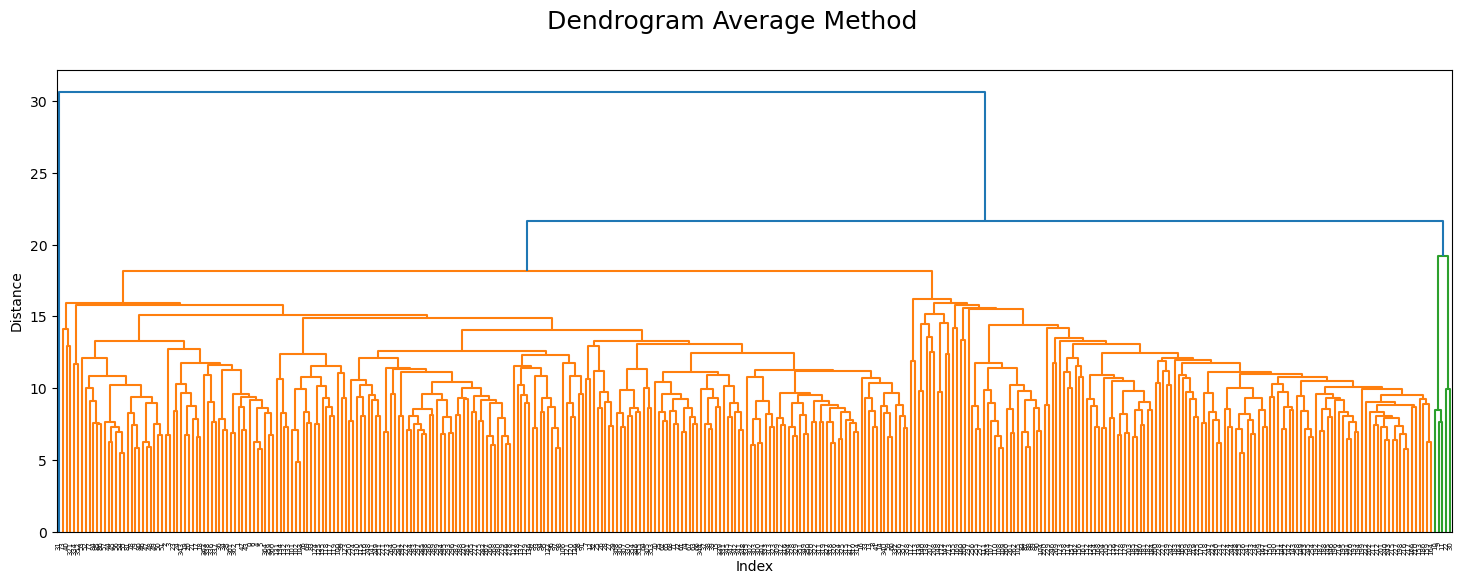

In [34]:
scaled_average = linkage(scaled_2019,method="average")
plt.figure(figsize=(18,6))
dendrogram(scaled_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

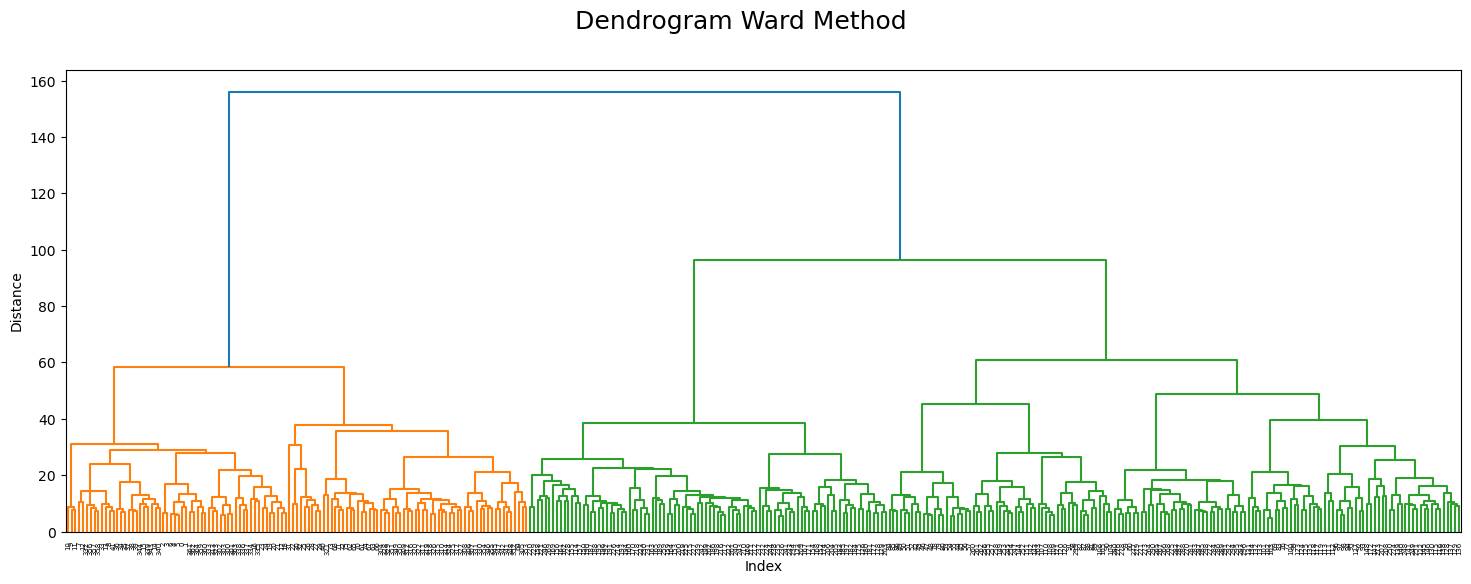

In [35]:
scaled_ward = linkage(scaled_2019,method="ward")
plt.figure(figsize=(18,6))
dendrogram(scaled_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

In [36]:
scaled_2019.columns

Index(['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean',
       'BASEL_temp_min',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=168)

# PCA

In [37]:
# the number of variables measured at each station varies, but the max is 11 so using that for PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(scaled_2019)

In [38]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-7.877110,2.823421,-1.042417,4.015804,0.428317,-0.889715,-1.224173,-0.735285,0.270098,0.720001,1.040477
1,-8.496269,5.384156,1.508944,3.386135,1.267630,-0.272062,-1.649925,0.059405,0.864047,0.505958,1.270409
2,-10.190505,7.125904,0.854599,3.936767,0.813699,3.210992,0.790849,0.929748,2.752122,0.837602,-2.103440
3,-11.097790,6.040884,0.491590,5.364309,0.464907,0.709307,1.087348,0.438508,1.992351,0.908196,-2.155435
4,-10.044650,3.675074,1.229049,6.202445,0.100108,-0.152300,-2.201164,0.906201,0.274569,1.795325,-0.517455
...,...,...,...,...,...,...,...,...,...,...,...
360,-8.829524,2.933543,1.188034,3.975646,-2.837514,-0.653901,-2.038981,1.108562,-1.216518,-0.386722,-0.764698
361,-9.594698,6.460104,-0.927244,4.122788,-2.376830,1.187263,0.178613,1.432416,0.203210,-2.522475,-0.846050
362,-9.384624,7.571177,-3.540603,3.419014,-1.539192,1.062651,-0.025097,0.290056,0.390057,-2.127005,-0.841676
363,-7.136749,8.646253,-3.012247,-0.562883,-0.715417,-2.570490,-0.613948,0.524424,0.132959,-1.117174,-0.339196


In [39]:
dfPCA.to_csv(os.path.join(path, '2019_PCA.csv'))